<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Chapter4.1: Fundamentals of Recurrent Neural Netwoks(RNN)</h2>
    <p>
    <strong>Objective</strong>:undrestand how RNNs process sequential data by maintaining a "memory" (hidden state).
    we will implement a vanilla RNN from scratch in Pytorch to predict a time-series sine wave.</p>
    <p><strong>Key Concept</strong>: Sequence Data, Hiden State, Backpropagation Through Time(BTT).</p>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 1: Imports & Hyperparameters</h2>
    <p>We start by setting up our environment. Key configurations include:</p>
    <ul>
        <li><span class="code-inline">SEQ_LENGTH (20)</span>: The model will look at 20 past data points to predict the 21st point.</li>
        <li><span class="code-inline">NUM_SAMPLES (1000)</span>: The total size of our dataset.</li>
    </ul>
</div>

In [7]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt

SEQ_LENGTH = 20 # how many pass points the model sees
NUM_SAMPLES = 1000 #total data points
TEST_SIZE = 0.2 #20% for testing



<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 2: Generating Synthetic Data</h2>
    <p>We use a Sine Wave as our "Hello World" dataset because it has a clear, predictable periodic pattern. 
    If our RNN works, it should learn this wave shape perfectly.</p>
    <p><strong>The Windowing Technique:</strong> RNNs need sequences, not single points. We slide a window of size <span class="code-inline">SEQ_LENGTH</span> across the data:</p>
    <ul>
        <li><strong>Input (X):</strong> [ t<sub>0</sub>, t<sub>1</sub>, ..., t<sub>19</sub> ]</li>
        <li><strong>Target (y):</strong> [ t<sub>20</sub> ]</li>
    </ul>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
<h2>Step 3: Reshaping for PyTorch</h2>
    <p>This is the most common error source in RNNs. PyTorch RNN layers expect a 3D tensor input:</p>
    
<p style="text-align: center; font-family: monospace; background-color: #313244; padding: 10px; border-radius: 5px;">
        (Batch_Size, Sequence_Length, Input_Features)
    </p>

<p>Since we are predicting a single value (amplitude), our <strong>Input_Features</strong> is 1. We use <span class="code-inline">unsqueeze(-1)</span> to add this dimension.</p>
</div>

In [8]:
#1.Generate Synthetic Data(sine waves)
# we add a little noise to make it more realistic 
t = np.linspace(0, 100, NUM_SAMPLES)
data = np.sin(t)
np.random.randn(NUM_SAMPLES) 

# 2. Prepare Dat Windows
def create_sequences(data, seq_lenght):
    xs, ys =[], []
    for i in range(len(data) - seq_lenght):
        x = data[i:i+seq_lenght]
        y = data[i+seq_lenght]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


X, y = create_sequences(data, SEQ_LENGTH)

# 3.Convert to Pytorch Tensor 
# RNN expects the following input shape( Batch_Size, Seq_lenght, Input_size)
train_size = int(len(X)*(1-TEST_SIZE))

X_train = torch.from_numpy(X[:train_size]).float().unsqueeze(-1)#add input size dim
y_train = torch.from_numpy(y[:train_size]).float().unsqueeze(-1)#add input size dim
X_test = torch.from_numpy(X[train_size:]).float().unsqueeze(-1)#add input size dim
y_test = torch.from_numpy(y[train_size:]).float().unsqueeze(-1)#add input size dim
print(f"Input Shape:{X_train.shape}->(Batch, Sequence, Features)")


Input Shape:torch.Size([784, 20, 1])->(Batch, Sequence, Features)


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class ="note-box">
    <h2> The Math: Inside the Hidden State</h2>
    <p> Unlike standard Feed-Forward networks, an RNN processes data sequentially. At every time step t, the netwok tales two inputs:
        <ul>
            <li><strong>The current input data:</strong>x_t</li>
            <li><strong>The previous hidden state:</strong>h{t-1}(Context from the past)</li>
            <li><strong>The new hidden state:</strong>h_t is calculated as follow:</li>
    </p>


$$ 

h_t = \tanh(W-{ih} x_t +b_{ih}+ W_{hh} H_{t-1}+ b_{hh})

$$
<p> the output y_t is then derived from this hidden state:</p>

$$

y_t=W_{hy} h_t + b_{y}

$$

</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 4: The RNN Class</h2>
    <p>We wrap <span class="code-inline">nn.RNN</span> in a custom class. Note two critical parts:</p>
    <ul>
        <li><strong>batch_first=True:</strong> Tells PyTorch our input is (Batch, Seq, Feature) instead of (Seq, Batch, Feature).</li>
        <li><strong>Forward Method:</strong> The RNN returns the output for <em>every</em> time step. We only want the prediction based on the <em>last</em> time step, so we slice it: <span class="code-inline">out[:, -1, :]</span>.</li>
    </ul>
</div>

In [4]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        #the RNN layer
        #batch_first = True means that the input format is (batch, seq, features)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        #the linear layer(decoder)
        #maps the final hidden state to the output value 
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        #initialize the hidden state with zeros 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = out[:,-1,:]
        out=self.fc(out)
        return out
    
input_size =1 
hidden_size = 32
output_size = 1
num_layers = 1
model = SimpleRNN(input_size, hidden_size, output_size, num_layers)
print(model)


SimpleRNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 5: Training</h2>
    <p>Because we are predicting a continuous number (the sine value), this is a <strong>Regression</strong> task.</p>
    <ul>
        <li><strong>Loss Function:</strong> MSELoss (Mean Squared Error).</li>
        <li><strong>Optimizer:</strong> Adam (standard choice for RNNs).</li>
    </ul>
</div>

Epoch [10/100], Loss: 0.024971
Epoch [20/100], Loss: 0.002590
Epoch [30/100], Loss: 0.003528
Epoch [40/100], Loss: 0.002359
Epoch [50/100], Loss: 0.001212
Epoch [60/100], Loss: 0.000458
Epoch [70/100], Loss: 0.000347
Epoch [80/100], Loss: 0.000243
Epoch [90/100], Loss: 0.000178
Epoch [100/100], Loss: 0.000146


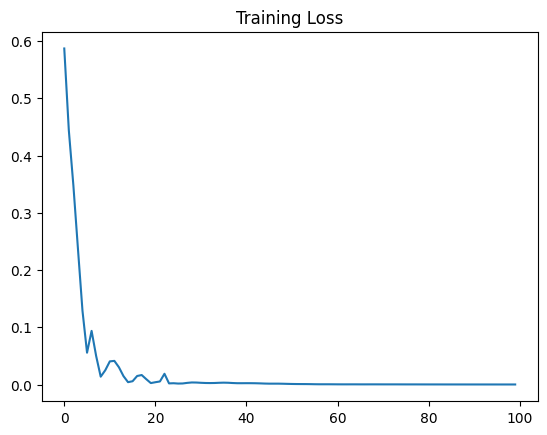

In [5]:
# Hyperparameters
learning_rate = 0.01
num_epochs = 100

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
train_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # 1. Forward Pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # 2. Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')
        
# Plot Loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;                  /* Soft Red/Pink */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        white-space: pre-wrap;
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
    <h2>Step 6: Evaluation & Visualization</h2>
    <p>We switch to <span class="code-inline">model.eval()</span> to disable gradient calculation. We then plot the predicted red line against the actual blue line.</p>
    <p>A perfect overlap means the RNN successfully learned the sine function logic.</p>
</div>

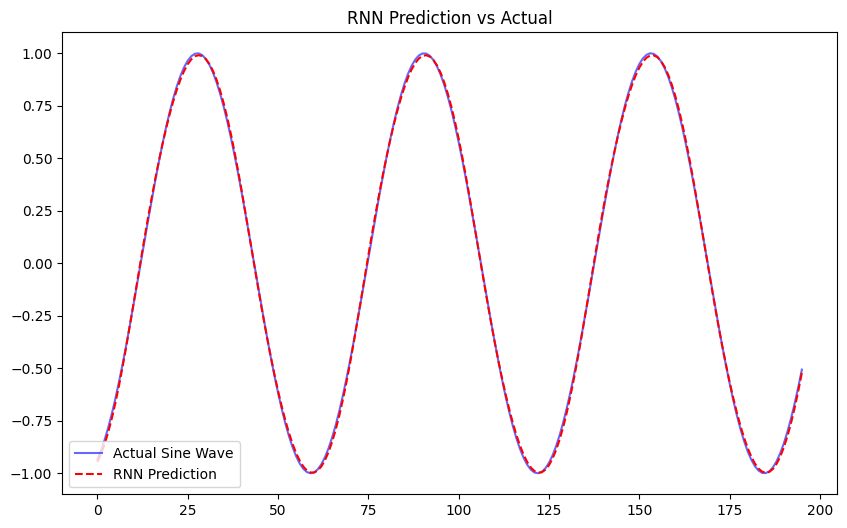

In [6]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Convert to numpy for plotting
predicted = test_predictions.numpy()
actual = y_test.numpy()

plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Sine Wave', color='blue', alpha=0.6)
plt.plot(predicted, label='RNN Prediction', color='red', linestyle='--')
plt.title("RNN Prediction vs Actual")
plt.legend()
plt.show()